<a href="https://colab.research.google.com/github/junjun3180/lab/blob/main/lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read in the data and perform basic exploratory analysis

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/wine.data.csv')
df.head(10)

#### Basic statistics

In [ ]:
df.iloc[:,1:].describe()

#### Boxplots by output labels/classes

In [ ]:
for c in df.columns[1:]:
    df.boxplot(c,by='Class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Wine Class", fontsize=16)

**It can be seen that some features classify the wine labels pretty clearly.** For example, Alcalinity, Total Phenols, or Flavonoids produce boxplots with well-separated medians, which are clearly indicative of wine classes.

Below is an example of class seperation using two variables

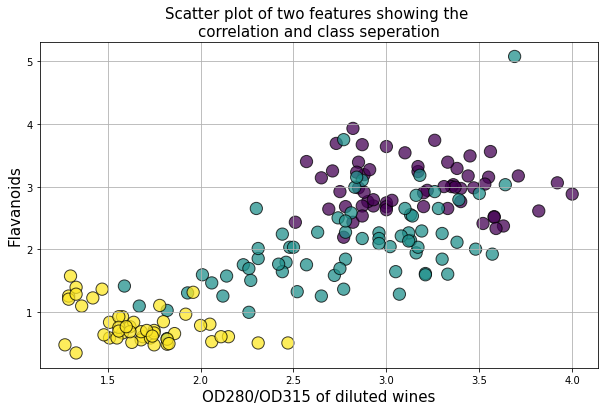

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(df['OD280/OD315 of diluted wines'],
            df['Flavanoids'],
            c=df['Class'],
            edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.show()

### Data scaling
PCA requires scaling/normalization of the data to work properly

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
X = df.drop('Class',axis=1)
y = df['Class']

In [9]:
X = scaler.fit_transform(X)

In [10]:
dfx = pd.DataFrame(data=X,columns=df.columns[1:])

In [ ]:
dfx.head(10)

In [ ]:
dfx.describe()

## Sequential Feature Selection [[ref](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector)]

In [13]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
sfs_forward = SequentialFeatureSelector(
    clf, n_features_to_select=2, direction="forward" ).fit(X, y)

In [14]:
sfs_forward.get_feature_names_out()

array(['x0', 'x6'], dtype=object)

In [15]:
dfx_sfs = dfx.loc[:, sfs_forward.get_support()]

In [16]:
dfx_sfs

,Alcohol,Flavanoids
0,1.518613,1.034819
1,0.246290,0.733629
2,0.196879,1.215533
3,1.691550,1.466525
4,0.295700,0.663351
...,...,...
173,0.876275,-1.424900
174,0.493343,-1.284344
175,0.332758,-1.344582
176,0.209232,-1.354622


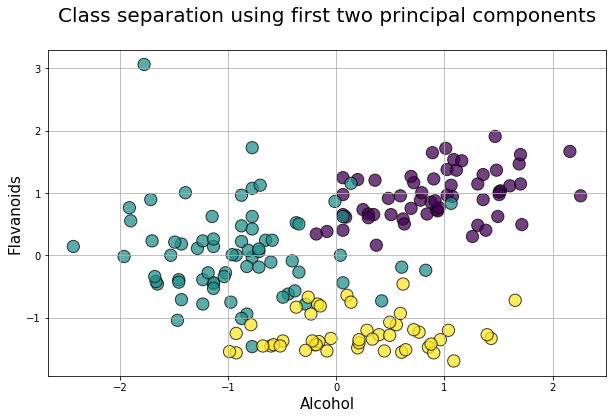

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_sfs.iloc[:, 0],dfx_sfs.iloc[:, 1],
            c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Alcohol",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.show()

## Principal Component Analysis [[ref](https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Clustering-Dimensionality-Reduction/Principal%20Component%20Analysis.ipynb)]

### PCA class import and analysis

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=None)

In [20]:
dfx_pca = pca.fit(dfx)

#### Plot the _explained variance ratio_

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

**The above plot means that the $1^{st}$ principal component explains about 36% of the total variance in the data and the $2^{nd}$ component explians further 20%. Therefore, if we just consider first two components, they together explain 56% of the total variance.**

### Showing better class separation using principal components

#### Transform the scaled data set using the fitted PCA object

In [22]:
dfx_trans = pca.transform(dfx)

#### Put it in a data frame

In [ ]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

#### Plot the first two columns of this transformed data set with the color set to original ground truth class label

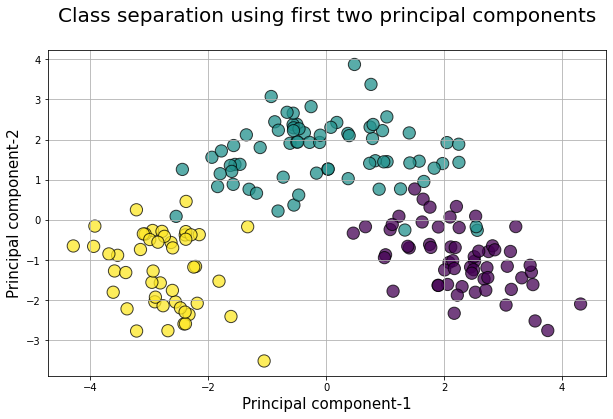

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

#TODO! Dimensionality Reduction & Classification

In [112]:
from sklearn.datasets import load_breast_cancer

BreastData = load_breast_cancer()

In [113]:
X = BreastData.data
y = BreastData.target

In [114]:
X.shape

(569, 30)

## Feature Selection 혹은 Extraction 적용하기
다양한 전처리 및 차원 축소를 수행하여 보다 좋은 형태의 입력인 `X_rdc`를 산출하시오. 

**[주의]** 전처리 및 축소 부분만 수정하여야 합니다.

In [120]:
####### Complete your code ##########
pca = PCA(n_components=2)
pca.fit(X)

#####################################
X_rdc = pca.transform(X)

## Data Split
아래 분류기는 고정하고, 입력 데이터 `X`에만 변화를 주시오.
**[주의]** 수정하지 마시오.

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rdc, y, test_size = 0.30, random_state=0)

## Model Training

In [122]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation
학습된 분류기를 평가하시오. 정확도 기준 차등 평가를 할 예정입니다.
- 0.970 < : 50 점
- 0.965 ~ 0.970: 40 점
- 0.960 ~ 0.965 : 30 점
- 0.960 > : 20 점

**[주의]** 수정하지 마시오.

In [123]:
predictions = model.predict(X_test)

In [124]:
from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(y_test, predictions)}')

accuracy: 0.9532163742690059
